# Can you predict the strength of concrete?

## 📖 Background
You work in the civil engineering department of a major university. You are part of a project testing the strength of concrete samples. 

Concrete is the most widely used building material in the world. It is a mix of cement and water with gravel and sand. It can also include other materials like fly ash, blast furnace slag, and additives. 

The compressive strength of concrete is a function of components and age, so your team is testing different combinations of ingredients at different time intervals. 

The project leader asked you to find a simple way to estimate strength so that students can predict how a particular sample is expected to perform.

## 💾 The data
The team has already tested more than a thousand samples ([source](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)):

#### Compressive strength data:
- "cement" - Portland cement in kg/m3
- "slag" - Blast furnace slag in kg/m3
- "fly_ash" - Fly ash in kg/m3
- "water" - Water in liters/m3
- "superplasticizer" - Superplasticizer additive in kg/m3
- "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3
- "fine_aggregate" - Fine aggregate (sand) in kg/m3
- "age" - Age of the sample in days
- "strength" - Concrete compressive strength in megapascals (MPa)

***Acknowledgments**: I-Cheng Yeh, "Modeling of strength of high-performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)*.

In [1]:
import pandas as pd
df = pd.read_csv('data/concrete_data.csv')
df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## 💪 Challenge
Provide your project leader with a formula that estimates the compressive strength. Include:

1. The average strength of the concrete samples at 1, 7, 14, and 28 days of age.
2. The coefficients $\beta_{0}$, $\beta_{1}$ ... $\beta_{8}$, to use in the following formula:

$$ Concrete \ Strength = \beta_{0} \ + \ \beta_{1}*cement \ + \ \beta_{2}*slag \ + \ \beta_{3}*fly \ ash  \ + \ \beta_{4}*water \ + $$ 
$$ \beta_{5}*superplasticizer \ + \ \beta_{6}*coarse \ aggregate \ + \ \beta_{7}*fine \ aggregate \ + \ \beta_{8}*age $$

## ⌛️ Time to do some data analysis and model development

Firstly, it is important to be acquainted with the data. To do so basic EDA should be conducted

In [2]:
df.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


By the first glance at the data, it is clear that there are no missing values, all data is represented by the continuous and discrete (age of the concrete) values with a huge variation between different features what is mean that scaling techniques should be conducted as a preprocessing step. To make these decisions more understandable graphics should be created. 

## ⛴ EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

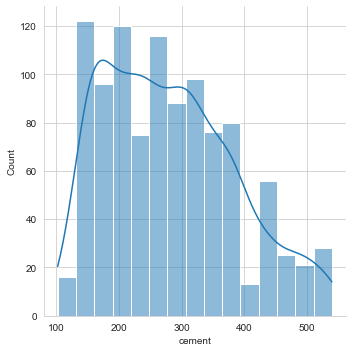

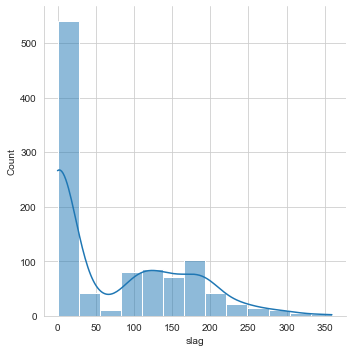

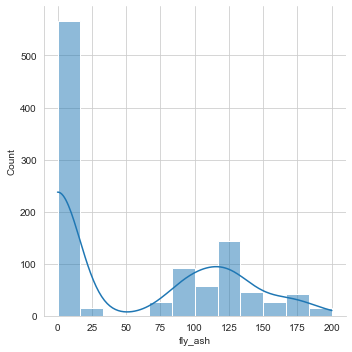

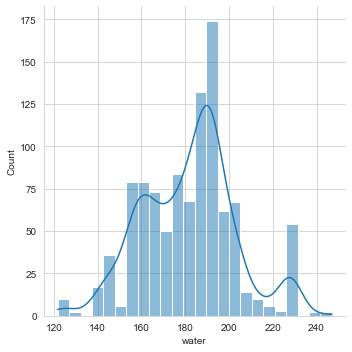

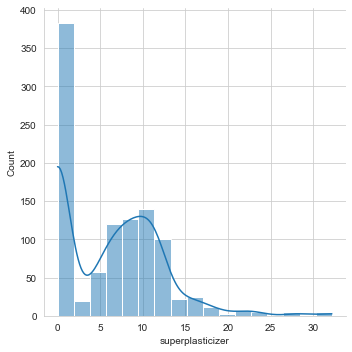

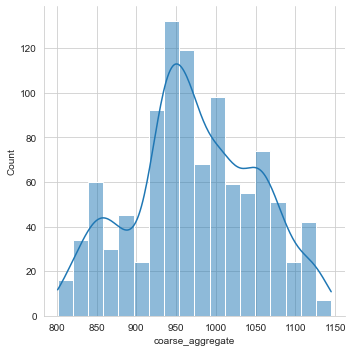

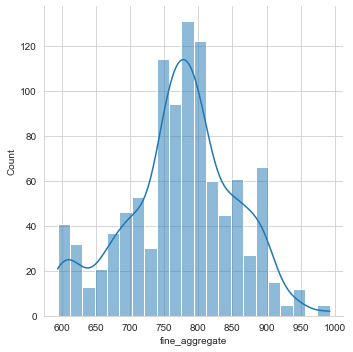

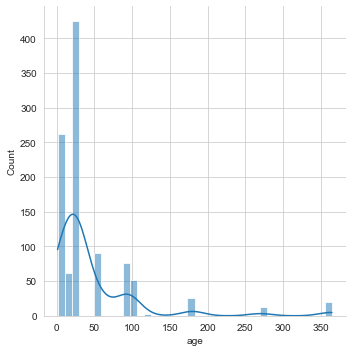

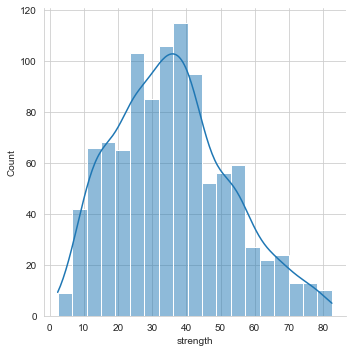

In [4]:
for c in df.columns :
    sns.displot(x=c, data=df, kde=True)

From the distibution graphs it is clear that the data is not normally distcibuted. To prove the hypothesis of the deviation of the distribution from normal some hypothesis testing.

In [69]:
#hypothesis testing using Kolmogorov-Smirnov test for goodness of fit
from scipy.stats import kstest
for c in df.columns :
    ks_statistic, p_value = kstest(df[c], 'norm')
    round(p_value, 5)
    print('=+' * 18 + '=' +'\n')
    print(f'For the {c}: \nthe statistic is: {ks_statistic}; \np-value is: {p_value}')
print('=+' * 18 + '=')

=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the cement: 
the statistic is: 1.0; 
p-value is: 0.0
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the slag: 
the statistic is: 0.5427184466019417; 
p-value is: 9.766338588352471e-285
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the fly_ash: 
the statistic is: 0.5; 
p-value is: 1.2357510751860894e-238
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the water: 
the statistic is: 1.0; 
p-value is: 0.0
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the superplasticizer: 
the statistic is: 0.6219510728421562; 
p-value is: 0.0
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the coarse_aggregate: 
the statistic is: 1.0; 
p-value is: 0.0
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the fine_aggregate: 
the statistic is: 1.0; 
p-value is: 0.0
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the age: 
the statistic is: 0.9967083543955544; 
p-value is: 0.0
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the strength: 
the statistic is: 0.9985787598807453; 
p-value is: 0.0
=+=+=+=+=+=+

In [73]:
#Shapiro-Wilk test for normality
from scipy.stats import shapiro
for c in df.columns :
    ks_statistic, p_value = shapiro(df[c])
    round(p_value, 5)
    print('=+' * 18 + '=' +'\n')
    print(f'For the {c}: \nthe statistic is: {ks_statistic}; \np-value is: {p_value};')
print('=+' * 18 + '=')

=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the cement: 
the statistic is: 0.9589571356773376; 
p-value is: 2.078041149622246e-16;
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the slag: 
the statistic is: 0.8124112486839294; 
p-value is: 5.7973629161288525e-33;
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the fly_ash: 
the statistic is: 0.7620092034339905; 
p-value is: 4.140206041459257e-36;
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the water: 
the statistic is: 0.9803996682167053; 
p-value is: 1.474172034443555e-10;
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the superplasticizer: 
the statistic is: 0.8660508394241333; 
p-value is: 9.102149547230668e-29;
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the coarse_aggregate: 
the statistic is: 0.9824541211128235; 
p-value is: 8.355026115403064e-10;
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the fine_aggregate: 
the statistic is: 0.9806743264198303; 
p-value is: 1.84647602763377e-10;
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

For the age: 
the statist

Based on the p-value obtained by Kolmogorov-Smirnov and Shapiro-Wilk tests as its value is all below 0.05 as was expected there is not normally distributed data. The main drawback of it is that poor results could be obtained in the ML model. To deal with this the normalization process should be performed as a preprocessing step.

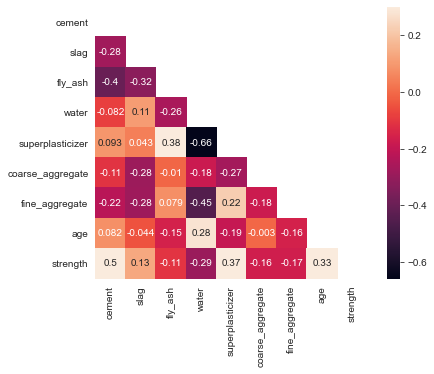

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

For the obtained above data, it is clear that there are no strong correlations between data features except superplasticizer/water, and cement/strength pairs (even the correlation strength is not quite big further investigation on their influence should be conducted) is mean that all of them influence the predicted value (strength) independently.

To visualise the influence of the features on the predicted variable (cement) there is a need to investigate their influence on it thought visualisation on scatter plot and relation plot.

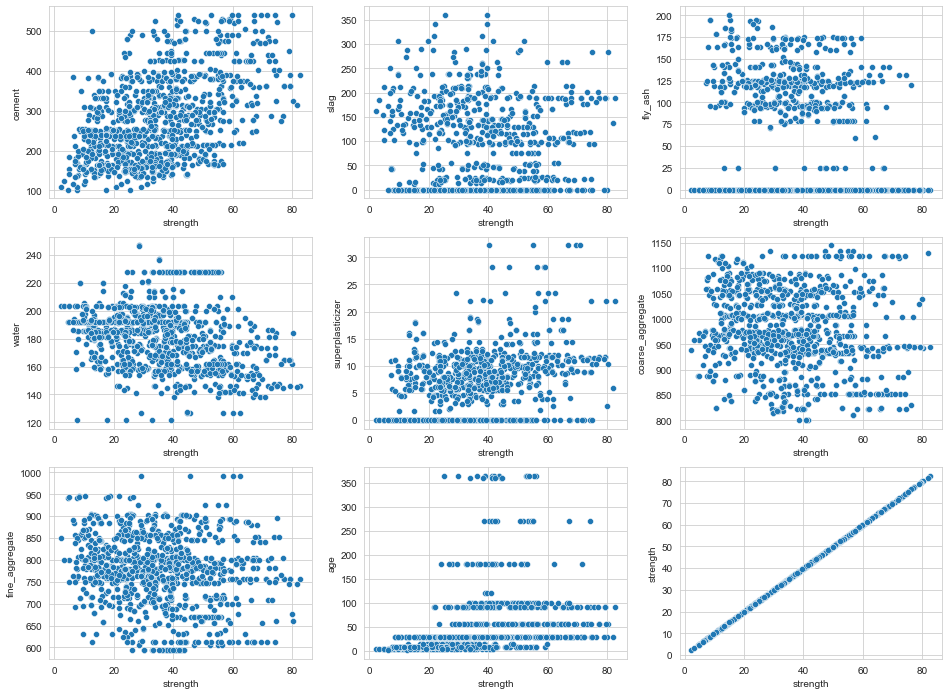

In [ ]:
f, ax = plt.subplots(3, 3, figsize=(16, 12))
i = 0
b = 0
for c in df.columns :
    sns.scatterplot(data=df, x='strength', y=c, ax=ax[b,i])
    i += 1
    if i > 2 :
        b += 1
        i = 0

From the obtained data above it seems like at the zero amount of **slag**, **fly_ash**, **superplasticizer** there is even distribution of the strength, which could affect the revealing the insight of the influence of adding these substances to the concrete mixture on the strength of this mixture. To overcome this possible drawback there is a need to investigate the relationship between these parameters and strength without zero values.

Also, it is clear that for the **age** parameter there use of a scatter plot is not very convenient the better graph type to represent the influence of this feature on the strength is a **boxplot**.

<AxesSubplot:xlabel='age', ylabel='strength'>

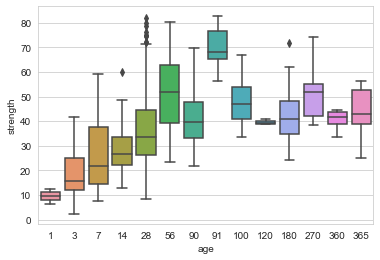

In [ ]:
sns.boxplot(data=df, x='age', y='strength')

From the boxplot representation of the strength of concrete, it emerges that the best strength could be assumed on the 91st day with a stabilization following a dramatic drop.

In [84]:
df_without_0 = df[(df.slag > 0) & (df.fly_ash > 0) & (df.superplasticizer > 0)]

<AxesSubplot:xlabel='strength', ylabel='superplasticizer'>

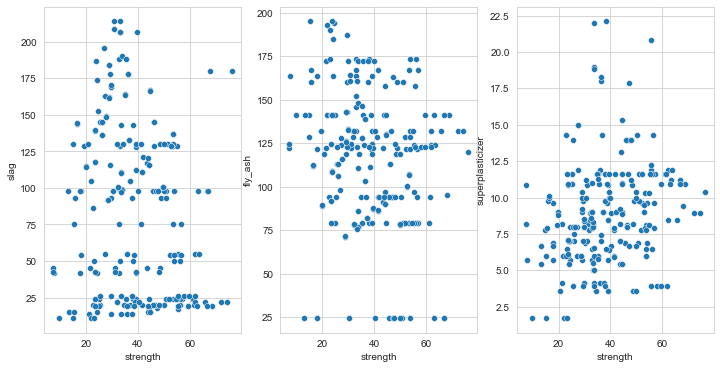

In [85]:
f, ax = plt.subplots(1,3, figsize=(12, 6))
sns.scatterplot(data=df_without_0, x='strength', y='slag', ax=ax[0])
sns.scatterplot(data=df_without_0, x='strength', y='fly_ash', ax=ax[1])
sns.scatterplot(data=df_without_0, x='strength', y='superplasticizer', ax=ax[2])

Even the removal of the zero-values doesn't affect the correlation between slag/fly ash/superplasticizer and strength. However non-linear relationship could be expected.

# 🤖 Model development

Based on the formula that estimates the compressive strength it is clear that the problem should be done by creating a **Linear regression model**.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

X = df.drop('strength', axis=1)
y = df.strength

To avoid overfitting on the test set data splitting should be followed by the use of a cross-validation score on **X_train**. In this case, **X_train** will be split into training and validation sets. and based on the validation set the model will be tuned. Then tuned model will be tested on the testing sets (**X_test**).

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

For the purpose of assembling several steps that can be cross-validated together while setting different parameters, the pipeline should be created.

The first step of pipeline creating is to choose the best preprocessing steps in this particular situation finding the best scaling technique. This process could be done by using **Normalizer**, **StandardScaler**, and **MaxAbsScaler**. To do so all these scaling techniques will be done and the resulting method that will be used in the future parameters tuning will be estimated based on the **mean absolute error (mae)**.

In [79]:
from sklearn.metrics import mean_squared_error, make_scorer

def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual

    square_distance = distance ** 2

    mean_square_distance = square_distance.mean()

    score = np.sqrt(mean_square_distance)

    return score

rmse = make_scorer(rmse)

In [173]:
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_absolute_error, make_scorer

steps = [('scaler', Normalizer()),
         ('model', LinearRegression())]
pipe_norm = Pipeline(steps=steps)
mae = make_scorer(mean_absolute_error)
print('For the Normalizer rmse is: ', cross_val_score(pipe_norm, X_train, y_train, cv=5, scoring=mae).mean())

For the Normalizer rmse is:  7.775095103527131


In [156]:
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()),
         ('model', LinearRegression())]
pipe_stsc = Pipeline(steps=steps)
mae = make_scorer(mean_absolute_error)

print('For the StandardScaler rmse is: ', cross_val_score(pipe_stsc, X_train, y_train, cv=5, scoring=mae).mean())

For the StandardScaler rmse is:  8.440114395437217


In [159]:
from sklearn.preprocessing import MaxAbsScaler 

steps = [('scaler', MaxAbsScaler()),
         ('model', LinearRegression())]
pipe_maxabs = Pipeline(steps=steps)
mae = make_scorer(mean_absolute_error)

print('For the MinMaxScaler rmse is: ', cross_val_score(pipe_maxabs, X_train, y_train, cv=5, scoring=mae).mean())

For the MinMaxScaler rmse is:  8.440114395437215


Based on the obtained data the best scaling method is **Normalizer** which will be used in the next modeling steps.

In [158]:
pipe_norm.fit(X_train, y_train)
pred = pipe_norm.predict(X_test)
mean_absolute_error(y_test, pred)

7.12452452999931

## Conclusions

As a result of the model preprocessing steps, the model with mae of 7.13 was developed. For scaling data in the model Normalizer were used. Further model tuning like outliers detecting and removing could be conducted.